In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import missingno as msg
import math
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('deliveries.csv')
df1 = pd.read_csv('matches.csv')

In [3]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
df1.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [6]:
df1.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

# Ques 1 - Win ?

In [7]:
main_df = df1[((df1['team1'] == 'Kolkata Knight Riders') & (df1['team2'] == 'Royal Challengers Bangalore')) | ((df1['team1'] == 'Royal Challengers Bangalore') & (df1['team2'] == 'Kolkata Knight Riders'))]
main_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
26,27,2017,Kolkata,2017-04-23,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,82,0,NM Coulter-Nile,Eden Gardens,CB Gaffaney,CK Nandan,NaN
44,45,2017,Bangalore,2017-05-07,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,6,SP Narine,M Chinnaswamy Stadium,AY Dandekar,C Shamshuddin,NaN
59,60,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
87,88,2008,Kolkata,2008-05-08,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,bat,normal,0,Kolkata Knight Riders,5,0,SC Ganguly,Eden Gardens,Asad Rauf,IL Howell,NaN
133,134,2009,Durban,2009-04-29,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Kingsmead,MR Benson,TH Wijewardene,NaN
155,156,2009,Centurion,2009-05-12,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,LRPL Taylor,SuperSport Park,M Erasmus,SS Hazare,NaN
177,178,2010,Kolkata,2010-03-14,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,7,MK Tiwary,Eden Gardens,HDPK Dharmasena,AM Saheba,NaN
216,217,2010,Bangalore,2010-04-10,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,R Vinay Kumar,M Chinnaswamy Stadium,K Hariharan,DJ Harper,NaN
257,258,2011,Kolkata,2011-04-22,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,9,CH Gayle,Eden Gardens,SS Hazare,RB Tiffin,NaN
290,291,2011,Bangalore,2011-05-14,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,1,Royal Challengers Bangalore,0,4,CH Gayle,M Chinnaswamy Stadium,RE Koertzen,RB Tiffin,NaN


In [8]:
# count winner

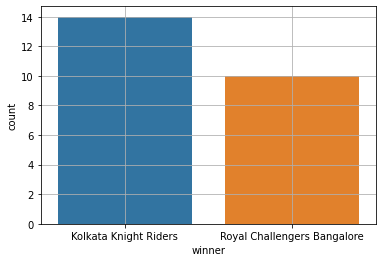

In [16]:
sb.countplot(main_df['winner'])
plt.grid()
plt.show()

In [10]:
main_df['winner'].value_counts()

Kolkata Knight Riders          14
Royal Challengers Bangalore    10
Name: winner, dtype: int64

In [11]:
recent_match = main_df[main_df['season'] >= 2017]

In [12]:
recent_match

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
26,27,2017,Kolkata,2017-04-23,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,82,0,NM Coulter-Nile,Eden Gardens,CB Gaffaney,CK Nandan,NaN
44,45,2017,Bangalore,2017-05-07,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,6,SP Narine,M Chinnaswamy Stadium,AY Dandekar,C Shamshuddin,NaN
638,7896,2018,Kolkata,08/04/18,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,4,SP Narine,Eden Gardens,C Shamshuddin,A.D Deshmukh,S Ravi
664,7922,2018,Bengaluru,29/04/18,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,6,CA Lynn,M Chinnaswamy Stadium,Nigel Llong,Anil Chaudhary,Virender Kumar Sharma
712,11153,2019,Bengaluru,05/04/19,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,5,AD Russell,M. Chinnaswamy Stadium,Anil Chaudhary,Chris Gaffaney,O Nandan
730,11326,2019,Kolkata,19/04/19,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Royal Challengers Bangalore,10,0,V Kohli,Eden Gardens,Ian Gould,Nitin Menon,Anil Dandekar


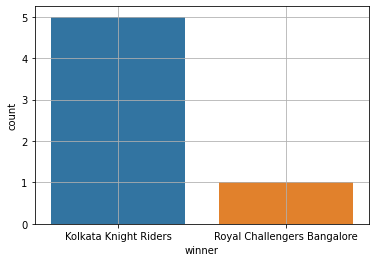

In [15]:
#for last 3 match
sb.countplot(recent_match['winner'])
plt.grid()
plt.show()

In [14]:
recent_match['winner'].value_counts()

Kolkata Knight Riders          5
Royal Challengers Bangalore    1
Name: winner, dtype: int64

In [24]:
main_df.groupby(['toss_decision' , 'winner'])[['team2','team1']].count()

team2  team1
toss_decision winner                                   
bat           Kolkata Knight Riders            2      2
              Royal Challengers Bangalore      1      1
field         Kolkata Knight Riders           12     12
              Royal Challengers Bangalore      9      9

In [25]:
recent_match.groupby(['toss_decision' , 'winner'])[['team2','team1']].count()

team2  team1
toss_decision winner                                   
field         Kolkata Knight Riders            5      5
              Royal Challengers Bangalore      1      1

# Take aways : 
### 1 - From the entire dataset ,we can see that KKR has won 14 times and RCB 10 ,and from past 3 seasons , KKR has won 5 times and RCB 1
### 2 - Since , this is a Shiek Zyada Stadium , Bowlers play a major role here , so KKR bowlers have a strong hold on this !
### 3 - In the last face-off , RCB won with a big margin
### 4 - This year ,RCB player are playing pretty good ,and the openers are doing good job !


# Ques 1 ans  - RCB

In [26]:
############################################################################################################################

# Ques 2 - Wickets lost by rcb from 5th till 20th over

In [70]:
main_df_team = df[(((df['batting_team'] == 'Kolkata Knight Riders')  & (df['bowling_team'] == 'Royal Challengers Bangalore')) | ((df['batting_team'] == 'Royal Challengers Bangalore')  & (df['bowling_team'] == 'Kolkata Knight Riders')))]
main_df_team

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
6254,27,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,SP Narine,G Gambhir,S Badree,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
6255,27,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,SP Narine,G Gambhir,S Badree,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
6256,27,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,SP Narine,G Gambhir,S Badree,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
6257,27,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,4,SP Narine,G Gambhir,S Badree,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
6258,27,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,5,SP Narine,G Gambhir,S Badree,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173253,11326,2,Kolkata Knight Riders,Royal Challengers Bangalore,20,2,N Rana,AD Russell,M Ali,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
173254,11326,2,Kolkata Knight Riders,Royal Challengers Bangalore,20,3,AD Russell,N Rana,M Ali,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
173255,11326,2,Kolkata Knight Riders,Royal Challengers Bangalore,20,4,AD Russell,N Rana,M Ali,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
173256,11326,2,Kolkata Knight Riders,Royal Challengers Bangalore,20,5,AD Russell,N Rana,M Ali,0,...,0,0,0,0,0,0,0,AD Russell,run out,V Kohli


In [71]:
# Take from 5th till 20th over

In [72]:
over = main_df_team[((main_df_team['over'] >=5) & (main_df_team['batting_team'] == 'Royal Challengers Bangalore'))]

In [73]:
over.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
6402,27,2,Royal Challengers Bangalore,Kolkata Knight Riders,5,1,KM Jadhav,CH Gayle,NM Coulter-Nile,0,...,0,0,0,0,0,0,0,KM Jadhav,caught,CR Woakes
6403,27,2,Royal Challengers Bangalore,Kolkata Knight Riders,5,2,STR Binny,CH Gayle,NM Coulter-Nile,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
6404,27,2,Royal Challengers Bangalore,Kolkata Knight Riders,5,3,STR Binny,CH Gayle,NM Coulter-Nile,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
6405,27,2,Royal Challengers Bangalore,Kolkata Knight Riders,5,4,STR Binny,CH Gayle,NM Coulter-Nile,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
6406,27,2,Royal Challengers Bangalore,Kolkata Knight Riders,5,5,STR Binny,CH Gayle,NM Coulter-Nile,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [74]:
# wickets lost by rcb players

In [93]:
x = over.groupby(['match_id'])['player_dismissed'].count()

In [94]:
x

match_id
27       7
45       4
60       8
88       3
134      5
156      4
178      6
217      2
258      1
291      5
317      7
344      5
392      1
441      9
468      5
506      4
522      7
550      2
606      6
624      1
7896     6
7922     4
11153    3
11326    3
Name: player_dismissed, dtype: int64

In [89]:
a = np.array([7,4,8,3,5,4,6,2,1,5,7,5,1,9,5,4,7,2,6,1,6,4,3,3])
stats.mode(a)

ModeResult(mode=array([4]), count=array([4]))

In [91]:
# lets check now wrt all team

In [92]:
main_df_rcb_all = df[((((df['batting_team'] == 'Royal Challengers Bangalore'))))]
main_df_rcb_all

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
125,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,Mandeep Singh,A Nehra,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,CH Gayle,A Nehra,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,CH Gayle,A Nehra,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,CH Gayle,A Nehra,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,CH Gayle,A Nehra,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177634,11345,2,Royal Challengers Bangalore,Sunrisers Hyderabad,19,6,C de Grandhomme,UT Yadav,K Ahmed,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
177635,11345,2,Royal Challengers Bangalore,Sunrisers Hyderabad,19,7,UT Yadav,C de Grandhomme,K Ahmed,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
177636,11345,2,Royal Challengers Bangalore,Sunrisers Hyderabad,19,8,UT Yadav,C de Grandhomme,K Ahmed,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
177637,11345,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,1,UT Yadav,C de Grandhomme,Mohammad Nabi,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [96]:
over = main_df_rcb_all[((main_df_rcb_all['over'] >=5) & (main_df_rcb_all['batting_team'] == 'Royal Challengers Bangalore'))]
x = over.groupby('match_id')['player_dismissed'].count()
x

match_id
1        10
5         7
8         2
12        5
17        8
         ..
11330     6
11333     3
11337     7
11340     2
11345     3
Name: player_dismissed, Length: 179, dtype: int64

In [98]:
x.values

array([10,  7,  2,  5,  8,  2,  7,  9,  8,  7,  8,  4,  6,  8,  5,  6,  9,
        4,  4,  7,  3,  9,  7,  6,  7,  7,  7,  6,  9,  6,  8,  5,  5,  8,
        0,  9,  6,  4,  6,  2,  3,  2,  8,  6,  2,  0,  3,  5,  9,  3,  4,
        8,  5,  2,  9,  4,  9,  8,  1,  3,  3,  7,  5,  1,  6,  5,  6,  0,
        1,  5,  8,  1,  3,  4,  6,  7,  7,  8, 10,  3,  3,  2,  5,  4,  5,
        1,  3,  4,  0,  8,  4,  6,  1,  5,  5,  3,  5,  7,  5,  3,  5,  3,
        3,  9,  3,  2,  1,  0,  5,  6,  4,  4,  8,  7,  4,  4,  4,  5,  4,
        5,  7, 10,  7,  6,  1,  0,  5,  2,  9,  3,  0,  5,  2,  4,  8,  3,
        4,  6,  2,  1,  6,  6,  3,  6,  2,  2,  1,  3,  2,  3,  7,  6,  5,
        5,  7,  3,  8,  4,  7,  8,  5,  3,  0,  5,  9,  9,  4,  6,  4,  3,
        7,  1,  6,  3,  6,  3,  7,  2,  3], dtype=int64)

In [99]:
a = np.array([10,  7,  2,  5,  8,  2,  7,  9,  8,  7,  8,  4,  6,  8,  5,  6,  9,
        4,  4,  7,  3,  9,  7,  6,  7,  7,  7,  6,  9,  6,  8,  5,  5,  8,
        0,  9,  6,  4,  6,  2,  3,  2,  8,  6,  2,  0,  3,  5,  9,  3,  4,
        8,  5,  2,  9,  4,  9,  8,  1,  3,  3,  7,  5,  1,  6,  5,  6,  0,
        1,  5,  8,  1,  3,  4,  6,  7,  7,  8, 10,  3,  3,  2,  5,  4,  5,
        1,  3,  4,  0,  8,  4,  6,  1,  5,  5,  3,  5,  7,  5,  3,  5,  3,
        3,  9,  3,  2,  1,  0,  5,  6,  4,  4,  8,  7,  4,  4,  4,  5,  4,
        5,  7, 10,  7,  6,  1,  0,  5,  2,  9,  3,  0,  5,  2,  4,  8,  3,
        4,  6,  2,  1,  6,  6,  3,  6,  2,  2,  1,  3,  2,  3,  7,  6,  5,
        5,  7,  3,  8,  4,  7,  8,  5,  3,  0,  5,  9,  9,  4,  6,  4,  3,
        7,  1,  6,  3,  6,  3,  7,  2,  3])
stats.mode(a)

ModeResult(mode=array([3]), count=array([26]))

# Take aways : 
### 1 - RCB loses around (3-4) or (4-5) wickets from 5th over till the last
### 2 - Since , it all depends on the opener, how long do they play ,such that other player gets less chance to bat
### 3 - This year RCB  , team opener are playing good ,and hence more wickets won't fall !

# Ques 2 ans - (2-3)

In [86]:
############################################################################################################################

# Ques 3 - no of Balls to reach 30 runs for abd ?

In [100]:
main_df_team

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
6254,27,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,SP Narine,G Gambhir,S Badree,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
6255,27,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,SP Narine,G Gambhir,S Badree,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
6256,27,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,SP Narine,G Gambhir,S Badree,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
6257,27,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,4,SP Narine,G Gambhir,S Badree,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
6258,27,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,5,SP Narine,G Gambhir,S Badree,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173253,11326,2,Kolkata Knight Riders,Royal Challengers Bangalore,20,2,N Rana,AD Russell,M Ali,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
173254,11326,2,Kolkata Knight Riders,Royal Challengers Bangalore,20,3,AD Russell,N Rana,M Ali,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
173255,11326,2,Kolkata Knight Riders,Royal Challengers Bangalore,20,4,AD Russell,N Rana,M Ali,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
173256,11326,2,Kolkata Knight Riders,Royal Challengers Bangalore,20,5,AD Russell,N Rana,M Ali,0,...,0,0,0,0,0,0,0,AD Russell,run out,V Kohli


In [101]:
main_df_team['batsman'].unique()

array(['SP Narine', 'G Gambhir', 'RV Uthappa', 'MK Pandey', 'YK Pathan',
       'SA Yadav', 'C de Grandhomme', 'CR Woakes', 'NM Coulter-Nile',
       'Kuldeep Yadav', 'UT Yadav', 'CH Gayle', 'V Kohli',
       'Mandeep Singh', 'AB de Villiers', 'KM Jadhav', 'STR Binny',
       'S Badree', 'P Negi', 'TS Mills', 'S Aravind', 'YS Chahal',
       'TM Head', 'CA Lynn', 'SC Ganguly', 'BB McCullum', 'RT Ponting',
       'DJ Hussey', 'Mohammad Hafeez', 'R Dravid', 'W Jaffer',
       'JH Kallis', 'CL White', 'MV Boucher', 'B Akhil', 'AA Noffke',
       'P Kumar', 'Z Khan', 'SB Joshi', 'A Chopra', 'BJ Hodge', 'T Taibu',
       'LR Shukla', 'M Kartik', 'WP Saha', 'Umar Gul', 'J Arunkumar',
       'S Chanderpaul', 'MN van Wyk', 'AB Agarkar', 'SP Goswami',
       'KP Pietersen', 'RE van der Merwe', 'AN Ghosh', 'AD Mathews',
       'JD Ryder', 'LRPL Taylor', 'EJG Morgan', 'MK Tiwary', 'CA Pujara',
       'OA Shah', 'AB Dinda', 'I Sharma', 'BAW Mendis', 'S Sriram',
       'BJ Haddin', 'TM Dilshan', 'L

In [102]:
abd = main_df_team[main_df_team['batsman'] == 'AB de Villiers']
abd

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
6384,27,2,Royal Challengers Bangalore,Kolkata Knight Riders,2,3,AB de Villiers,CH Gayle,UT Yadav,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
6385,27,2,Royal Challengers Bangalore,Kolkata Knight Riders,2,4,AB de Villiers,CH Gayle,UT Yadav,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
6386,27,2,Royal Challengers Bangalore,Kolkata Knight Riders,2,5,AB de Villiers,CH Gayle,UT Yadav,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
6387,27,2,Royal Challengers Bangalore,Kolkata Knight Riders,2,6,AB de Villiers,CH Gayle,UT Yadav,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
6389,27,2,Royal Challengers Bangalore,Kolkata Knight Riders,3,2,AB de Villiers,CH Gayle,NM Coulter-Nile,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168767,11153,1,Royal Challengers Bangalore,Kolkata Knight Riders,16,6,AB de Villiers,V Kohli,P Krishna,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
168773,11153,1,Royal Challengers Bangalore,Kolkata Knight Riders,17,6,AB de Villiers,V Kohli,L Ferguson,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
168783,11153,1,Royal Challengers Bangalore,Kolkata Knight Riders,19,4,AB de Villiers,MP Stoinis,SP Narine,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
168784,11153,1,Royal Challengers Bangalore,Kolkata Knight Riders,19,5,AB de Villiers,MP Stoinis,SP Narine,0,...,0,0,0,0,1,1,2,NaN,NaN,NaN


In [113]:
abd.groupby(['match_id' , 'ball'])['batsman_runs'].sum()

match_id  ball
27        2        4
          3        0
          4        4
          5        0
          6        0
                  ..
11153     3        7
          4        8
          5       12
          6       26
          7        0
Name: batsman_runs, Length: 83, dtype: int64

In [124]:
sum = 0
c =0
x = []
run = []
match = abd['match_id'].unique()
for i in match:
    m = abd[abd['match_id'] == i]
    m.reset_index(drop = True ,inplace = True)
    for j in range(len(m)):
        sum = sum + m.loc[j ,'batsman_runs']
        c = c+1
        if sum >= 30:
            x.append(c)
            run.append(sum)
            c = 0
            sum = 0
    
print(x)
print(run)

[28, 31, 25, 31, 22, 19, 13, 21, 18, 10]
[31, 31, 30, 35, 32, 31, 34, 30, 32, 30]


In [125]:
np.array(x).mean()

21.8

In [126]:
# lets check wrt all team

In [128]:
main_df_rcb_all
abd = main_df_rcb_all[main_df_rcb_all['batsman'] == 'AB de Villiers']
sum = 0
c =0
x = []
run = []
match = abd['match_id'].unique()
for i in match:
    m = abd[abd['match_id'] == i]
    m.reset_index(drop = True ,inplace = True)
    for j in range(len(m)):
        sum = sum + m.loc[j ,'batsman_runs']
        c = c+1
        if sum >= 30:
            x.append(c)
            run.append(sum)
            c = 0
            sum = 0
    
print(x)
print(run)

[26, 14, 15, 31, 46, 20, 23, 29, 16, 38, 25, 15, 23, 21, 25, 32, 17, 27, 16, 29, 12, 20, 24, 15, 22, 10, 16, 39, 17, 17, 25, 19, 15, 17, 12, 26, 16, 22, 12, 32, 28, 31, 13, 14, 17, 17, 22, 11, 15, 15, 17, 26, 17, 17, 14, 16, 18, 26, 25, 26, 16, 23, 12, 16, 9, 12, 36, 13, 20, 15, 18, 15, 26, 20, 14, 21, 24, 22, 31, 14, 28, 17, 18, 11, 10, 24, 17, 25, 14, 23, 17, 28, 15, 23, 16, 11, 16, 13, 21, 22, 15, 13, 22, 15, 24, 29, 16, 15, 24, 13, 20, 24, 16, 26, 18, 20, 24, 18, 10]
[30, 33, 30, 31, 33, 30, 31, 30, 31, 30, 30, 31, 33, 33, 30, 31, 30, 30, 30, 31, 30, 32, 33, 33, 30, 33, 31, 33, 32, 34, 31, 32, 30, 32, 30, 30, 30, 30, 30, 30, 30, 30, 33, 30, 30, 30, 30, 30, 33, 31, 31, 33, 30, 33, 30, 30, 30, 31, 33, 31, 32, 30, 30, 31, 30, 33, 35, 32, 34, 33, 31, 33, 30, 30, 34, 30, 31, 34, 33, 32, 34, 30, 35, 30, 35, 35, 31, 30, 34, 30, 34, 30, 30, 33, 30, 32, 33, 30, 30, 32, 33, 30, 30, 33, 31, 30, 31, 31, 31, 32, 30, 30, 30, 30, 30, 30, 30, 32, 35]


In [129]:
np.array(x).mean()

19.907563025210084

# Take Aways : 
### 1 - Abd takes 22 balls to reach his 30 when playing against KKR
### 2 - Abd takes 20 balls to reach his 30 when playing against all the team
### 3 - Since , Abd comes after 3rd wicket , he has to play a little slow just to maintain a partnership

# Ques 3 ans - (18-24) balls

In [131]:
##########################################################################################################################3

# Ques 4 - Eoin morgan last 7 ball Strike rate ?

In [133]:
main_df_team

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
6254,27,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,SP Narine,G Gambhir,S Badree,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
6255,27,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,SP Narine,G Gambhir,S Badree,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
6256,27,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,SP Narine,G Gambhir,S Badree,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
6257,27,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,4,SP Narine,G Gambhir,S Badree,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
6258,27,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,5,SP Narine,G Gambhir,S Badree,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173253,11326,2,Kolkata Knight Riders,Royal Challengers Bangalore,20,2,N Rana,AD Russell,M Ali,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
173254,11326,2,Kolkata Knight Riders,Royal Challengers Bangalore,20,3,AD Russell,N Rana,M Ali,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
173255,11326,2,Kolkata Knight Riders,Royal Challengers Bangalore,20,4,AD Russell,N Rana,M Ali,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
173256,11326,2,Kolkata Knight Riders,Royal Challengers Bangalore,20,5,AD Russell,N Rana,M Ali,0,...,0,0,0,0,0,0,0,AD Russell,run out,V Kohli


In [135]:
morgan = main_df_team[((main_df_team['batsman'] == 'EJG Morgan') & (main_df_team['batting_team'] == 'Kolkata Knight Riders'))]
morgan

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
60997,258,1,Kolkata Knight Riders,Royal Challengers Bangalore,18,3,EJG Morgan,YK Pathan,S Aravind,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
61001,258,1,Kolkata Knight Riders,Royal Challengers Bangalore,19,1,EJG Morgan,YK Pathan,Z Khan,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
61003,258,1,Kolkata Knight Riders,Royal Challengers Bangalore,19,3,EJG Morgan,YK Pathan,Z Khan,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
61010,258,1,Kolkata Knight Riders,Royal Challengers Bangalore,20,4,EJG Morgan,YK Pathan,S Aravind,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
61012,258,1,Kolkata Knight Riders,Royal Challengers Bangalore,20,6,EJG Morgan,MK Tiwary,S Aravind,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
61013,258,1,Kolkata Knight Riders,Royal Challengers Bangalore,20,7,EJG Morgan,MK Tiwary,S Aravind,0,...,0,0,0,0,0,0,0,EJG Morgan,run out,AB de Villiers
68723,291,1,Kolkata Knight Riders,Royal Challengers Bangalore,2,1,EJG Morgan,JH Kallis,CK Langeveldt,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
68728,291,1,Kolkata Knight Riders,Royal Challengers Bangalore,2,6,EJG Morgan,JH Kallis,CK Langeveldt,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
68729,291,1,Kolkata Knight Riders,Royal Challengers Bangalore,3,1,EJG Morgan,JH Kallis,Z Khan,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
68730,291,1,Kolkata Knight Riders,Royal Challengers Bangalore,3,2,EJG Morgan,JH Kallis,Z Khan,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [137]:
last = morgan.tail(7)

In [138]:
first = morgan.head(len(morgan)-len(last))

In [139]:
first

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
60997,258,1,Kolkata Knight Riders,Royal Challengers Bangalore,18,3,EJG Morgan,YK Pathan,S Aravind,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
61001,258,1,Kolkata Knight Riders,Royal Challengers Bangalore,19,1,EJG Morgan,YK Pathan,Z Khan,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
61003,258,1,Kolkata Knight Riders,Royal Challengers Bangalore,19,3,EJG Morgan,YK Pathan,Z Khan,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
61010,258,1,Kolkata Knight Riders,Royal Challengers Bangalore,20,4,EJG Morgan,YK Pathan,S Aravind,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
61012,258,1,Kolkata Knight Riders,Royal Challengers Bangalore,20,6,EJG Morgan,MK Tiwary,S Aravind,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
61013,258,1,Kolkata Knight Riders,Royal Challengers Bangalore,20,7,EJG Morgan,MK Tiwary,S Aravind,0,...,0,0,0,0,0,0,0,EJG Morgan,run out,AB de Villiers
68723,291,1,Kolkata Knight Riders,Royal Challengers Bangalore,2,1,EJG Morgan,JH Kallis,CK Langeveldt,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
68728,291,1,Kolkata Knight Riders,Royal Challengers Bangalore,2,6,EJG Morgan,JH Kallis,CK Langeveldt,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
68729,291,1,Kolkata Knight Riders,Royal Challengers Bangalore,3,1,EJG Morgan,JH Kallis,Z Khan,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [140]:
last

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
68730,291,1,Kolkata Knight Riders,Royal Challengers Bangalore,3,2,EJG Morgan,JH Kallis,Z Khan,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
68731,291,1,Kolkata Knight Riders,Royal Challengers Bangalore,3,3,EJG Morgan,JH Kallis,Z Khan,0,...,0,0,0,0,0,0,0,EJG Morgan,caught,LA Pomersbach
92735,392,1,Kolkata Knight Riders,Royal Challengers Bangalore,17,4,EJG Morgan,MK Tiwary,R Vinay Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
92736,392,1,Kolkata Knight Riders,Royal Challengers Bangalore,17,5,EJG Morgan,MK Tiwary,R Vinay Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
92737,392,1,Kolkata Knight Riders,Royal Challengers Bangalore,17,6,EJG Morgan,MK Tiwary,R Vinay Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
92738,392,1,Kolkata Knight Riders,Royal Challengers Bangalore,18,1,EJG Morgan,MK Tiwary,RP Singh,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
92739,392,1,Kolkata Knight Riders,Royal Challengers Bangalore,18,2,EJG Morgan,MK Tiwary,RP Singh,0,...,0,0,0,0,0,0,0,EJG Morgan,caught,DT Christian (sub)


In [149]:
first.groupby(['match_id' , 'ball'])['batsman_runs'].sum()

match_id  ball
258       1       1
          3       2
          4       1
          6       2
          7       0
291       1       1
          6       1
Name: batsman_runs, dtype: int64

In [150]:
last.groupby(['match_id' , 'ball'])['batsman_runs'].sum()

match_id  ball
291       2       0
          3       0
392       1       2
          2       0
          4       0
          5       0
          6       0
Name: batsman_runs, dtype: int64

In [153]:
f_sr = 2/2
l_sr = 0/2

In [155]:
f_sr - l_sr

1.0

In [156]:
# change in 100 strike rate
# data is very less

In [162]:
# lets check for all team

In [163]:
main_df_kkr_all = df[(((df['batting_team'] == 'Kolkata Knight Riders')))]
main_df_kkr_all.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
617,3,2,Kolkata Knight Riders,Gujarat Lions,1,1,G Gambhir,CA Lynn,P Kumar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
618,3,2,Kolkata Knight Riders,Gujarat Lions,1,2,CA Lynn,G Gambhir,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
619,3,2,Kolkata Knight Riders,Gujarat Lions,1,3,CA Lynn,G Gambhir,P Kumar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
620,3,2,Kolkata Knight Riders,Gujarat Lions,1,4,G Gambhir,CA Lynn,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
621,3,2,Kolkata Knight Riders,Gujarat Lions,1,5,G Gambhir,CA Lynn,P Kumar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [169]:
morgan = main_df_kkr_all[((main_df_kkr_all['batsman'] == 'EJG Morgan') & (main_df_kkr_all['batting_team'] == 'Kolkata Knight Riders'))]
last = morgan.tail(7)
first = morgan.head(len(morgan)-len(last))
run1 = first.groupby(['match_id' , 'ball'])['batsman_runs'].sum().values
run2 = last.groupby(['match_id' , 'ball'])['batsman_runs'].sum().values

In [173]:
f_sr = run1.sum() / len(run1)
l_sr = run2.sum() / len(run2)


In [174]:
f_sr , l_sr

(3.581967213114754, 1.75)

In [175]:
f_sr - l_sr

1.831967213114754

# Take aways :
### 1 - Eoin morgan is a good left handed batsman , but he is not in his form this year
### 2 - Morgan comes at the 5th position in batting lineup , i.e at the last
### 3 - Hence , he have to score good in the death overs
### 4 - There won't be much change in his sr

# Ques 4 ans - (75 - 125)

In [177]:
############################################################################################################################

# Ques 5 - RCB death over score againt kkr

In [200]:
death = main_df_team[((main_df_team['over'] >=16) & (main_df_team['batting_team'] == 'Royal Challengers Bangalore'))]

In [201]:
death

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
10498,45,1,Royal Challengers Bangalore,Kolkata Knight Riders,16,1,Mandeep Singh,TM Head,SP Narine,0,...,0,0,0,0,0,0,0,Mandeep Singh,caught,UT Yadav
10499,45,1,Royal Challengers Bangalore,Kolkata Knight Riders,16,2,TM Head,KM Jadhav,SP Narine,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
10500,45,1,Royal Challengers Bangalore,Kolkata Knight Riders,16,3,KM Jadhav,TM Head,SP Narine,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
10501,45,1,Royal Challengers Bangalore,Kolkata Knight Riders,16,4,TM Head,KM Jadhav,SP Narine,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
10502,45,1,Royal Challengers Bangalore,Kolkata Knight Riders,16,5,KM Jadhav,TM Head,SP Narine,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173125,11326,1,Royal Challengers Bangalore,Kolkata Knight Riders,20,2,MP Stoinis,V Kohli,H Gurney,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
173126,11326,1,Royal Challengers Bangalore,Kolkata Knight Riders,20,3,MP Stoinis,V Kohli,H Gurney,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
173127,11326,1,Royal Challengers Bangalore,Kolkata Knight Riders,20,4,MP Stoinis,V Kohli,H Gurney,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
173128,11326,1,Royal Challengers Bangalore,Kolkata Knight Riders,20,5,V Kohli,MP Stoinis,H Gurney,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [202]:
score = death.groupby('match_id')['total_runs'].sum().values
print(stats.mode(score))
print(np.mean(score))

ModeResult(mode=array([42], dtype=int64), count=array([2]))
47.57142857142857


In [192]:
# lets check for all team

In [193]:
death = main_df_rcb_all[((main_df_rcb_all['over'] >=16) & (main_df_rcb_all['batting_team'] == 'Royal Challengers Bangalore'))]

In [199]:
score = death.groupby('match_id')['total_runs'].sum()
print(stats.mode(score))
print(np.mean(score))

ModeResult(mode=array([42], dtype=int64), count=array([8]))
47.763636363636365


# Take aways:
### 1 - Death runs depends on the batsman playing
### 2 - Since, it is sheikh zyada stadium , hitting boundries will be tough in the death
### 3 - Avg death mode runs for rcb vs kkr is 42 ,and wrt all team is 42
### 4 - Avg runs for rcb vs kkr is 47.5 and wrt all team is 47.7

# Ques 5 ans - (46-60)